# In clustering project we dont have Y column we perform everything on x column only

# Import Libraries

In [1]:
import pandas as pd

from warnings import filterwarnings
filterwarnings("ignore")

import matplotlib.pyplot as plt

# Read Dataset

In [2]:
A=pd.read_csv(r"C:\Users\Aishwarya\OneDrive\Desktop\AI\Cars93.csv")

# Profile

In [3]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [11]:
X = A[["Price","MPG.city"]]
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
C = pd.DataFrame(mm.fit_transform(X),columns=["Price","MPG.city"])
C.head()

,Price,MPG.city
0,0.155963,0.322581
1,0.486239,0.096774
2,0.398165,0.161290
3,0.555963,0.129032
4,0.414679,0.225806


# Clustering Model(KMeans)

In [32]:
from sklearn.cluster import KMeans  #Select the number K to decide the number of clusters.
km = KMeans(n_clusters=3)
model = km.fit(C)
model.labels_

array([2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 1])

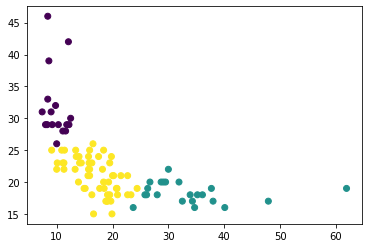

In [33]:
plt.scatter(A.Price,A['MPG.city'],c=model.labels_)   #plotting the K to decide the numbers of cluster

In [15]:
X['clusters']=model.labels_
X['Make']=A.Make

In [16]:
X

,Price,MPG.city,clusters,Make
0,15.9,25,0,Acura Integra
1,33.9,18,1,Acura Legend
2,29.1,20,1,Audi 90
3,37.7,19,1,Audi 100
4,30.0,22,1,BMW 535i
...,...,...,...,...
88,19.7,17,0,Volkswagen Eurovan
89,20.0,21,0,Volkswagen Passat
90,23.3,18,0,Volkswagen Corrado
91,22.7,21,0,Volvo 240


# Now we will give the input as car names and see which suggestions we get

In [19]:
q = input("Enter car name: ")
cc = int(X[X.Make == q].clusters)
print("Your recommendations:\n\n",list(X[(X.clusters == cc)&(X.Make!=q)].Make))

Enter car name: Audi 100
Your recommendations:

 ['Acura Legend', 'Audi 90', 'BMW 535i', 'Buick Roadmaster', 'Buick Riviera', 'Cadillac DeVille', 'Cadillac Seville', 'Chevrolet Corvette', 'Chrysler Imperial', 'Dodge Stealth', 'Infiniti Q45', 'Lexus ES300', 'Lexus SC300', 'Lincoln Continental', 'Lincoln Town_Car', 'Mazda RX-7', 'Mercedes-Benz 190E', 'Mercedes-Benz 300E', 'Mitsubishi Diamante', 'Saab 900', 'Volvo 850']


# `How many clusters are best clusters we will find with WCSS

In [27]:
k = []
WCSS = []
for i in range(2,20):
    km = KMeans(n_clusters=i)
    model = km.fit(C)
    WCSS.append(model.inertia_)
    k.append(i)

In [30]:
k

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

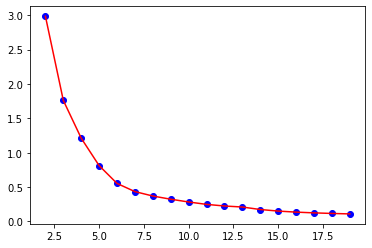

In [31]:
import matplotlib.pyplot as plt
plt.scatter(k,WCSS,c="blue")
plt.plot(k,WCSS,c="red")